<a href="https://colab.research.google.com/github/RafaelTorresCH/senalesysistemas_/blob/main/PARCIAL_1/PREGUNTA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 - Sistemas y Señales (2025-1)
##**Pregunta 4**
### **Nombre:** Rafael Ricardo Torres Choperena
---



# Análisis de Fourier usando la segunda derivada de la señal $x(t)$

##  Cálculo de $c_n$ desde $x''(t)$

Se parte de la fórmula estándar del coeficiente exponencial de Fourier:

$$
c_n = \frac{1}{T} \int_{t_i}^{t_f} x(t)\, e^{-jn\omega_0 t} \,dt
$$

Al aplicar integración por partes dos veces y asumir que la señal es periódica (o al menos que sus extremos se cancelan), se obtiene:

$$
c_n = \frac{1}{T(jn\omega_0)^2} \int x''(t)\, e^{-jn\omega_0 t} \,dt
$$

Dado que $T = t_f - t_i$, esto se puede expresar como:

$$
c_n = \frac{1}{(t_i - t_f)\, n^2\, \omega_0^2} \int x''(t)\, e^{-jn\omega_0 t} \,dt
$$

Esto permite calcular los coeficientes $c_n$ directamente a partir de la segunda derivada de la señal, ajustando con el factor $1/(n^2 \omega_0^2)$.

---

##Cálculo de $a_n$ y $b_n$ desde $x''(t)$

Al derivar dos veces la serie trigonométrica de Fourier, los términos en seno y coseno quedan multiplicados por un factor $(n\omega_0)^2$. Esto permite obtener los coeficientes $a_n$ y $b_n$ a partir de $x''(t)$ mediante las siguientes fórmulas:

$$
a_n = -\frac{2}{T(n\omega_0)^2} \int x''(t)\, \cos(n\omega_0 t) \,dt
$$

$$
b_n = -\frac{2}{T(n\omega_0)^2} \int x''(t)\, \sin(n\omega_0 t) \,dt
$$

Estas expresiones permiten calcular la serie trigonométrica de forma equivalente utilizando la segunda derivada de la señal.

---

## Espectro de Fourier

A partir de los coeficientes $c_n$, se pueden calcular las siguientes características del espectro para $n = -5, \dots, 5$:

- **Magnitud**:

  $$
  |c_n| = \sqrt{\left( \Re\{c_n\} \right)^2 + \left( \Im\{c_n\} \right)^2}
  $$

- **Fase**:

  $$
  \arg(c_n) = \tan^{-1}\left( \frac{ \Im\{c_n\} }{ \Re\{c_n\} } \right)
  $$

- **Parte real**: $\Re\{c_n\}$  
- **Parte imaginaria**: $\Im\{c_n\}$

También se puede realizar una reconstrucción truncada de la señal original utilizando:

$$
x(t) \approx \sum_{n=-5}^{5} c_n\, e^{jn\omega_0 t}
$$

Y evaluar el error relativo entre la señal original y la reconstruida mediante:

$$
E_{\text{rel}} = \frac{ \| x(t) - x_{\text{aprox}}(t) \| }{ \| x(t) \| } =
\frac{ \left( \int |x(t) - x_{\text{aprox}}(t)|^2 \,dt \right)^{1/2} }{ \left( \int |x(t)|^2 \,dt \right)^{1/2} }
$$



---

## Comparación con los coeficientes obtenidos desde $x(t)$

Los coeficientes obtenidos desde $x''(t)$ se pueden comparar con los obtenidos directamente desde $x(t)$ mediante la relación:

$$
c_n = -\frac{c_n^{(x'')}}{(n\omega_0)^2}
$$

Al graficar ambos espectros, se espera una coincidencia precisa (salvo diferencias numéricas menores). También se puede comparar la reconstrucción de la señal usando ambas versiones y calcular el error en cada caso para validar la equivalencia.




<ipython-input-17-24f290975830>:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  I = np.trapz(x2p * np.exp(-1j*n*wo*tv), tv)
<ipython-input-17-24f290975830>:57: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Px = np.trapz(np.abs(x)**2, tv)        # esto es como la energía de la señal original


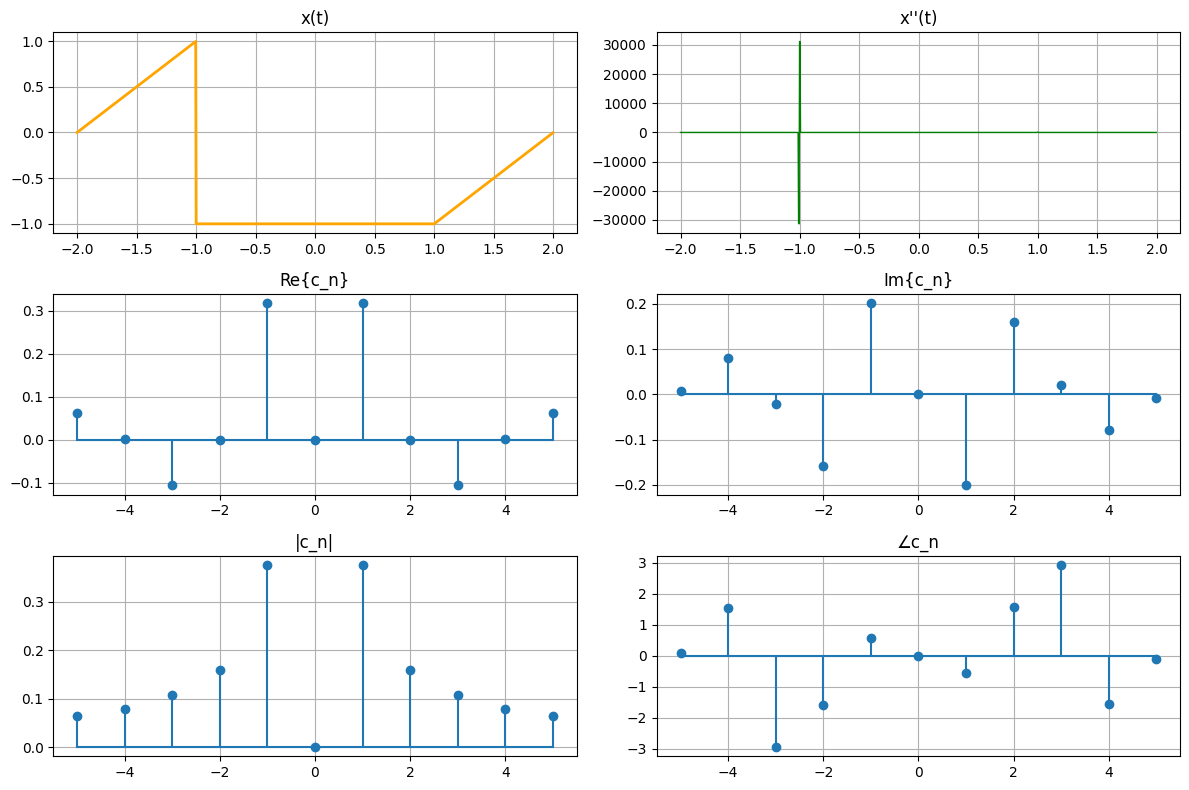

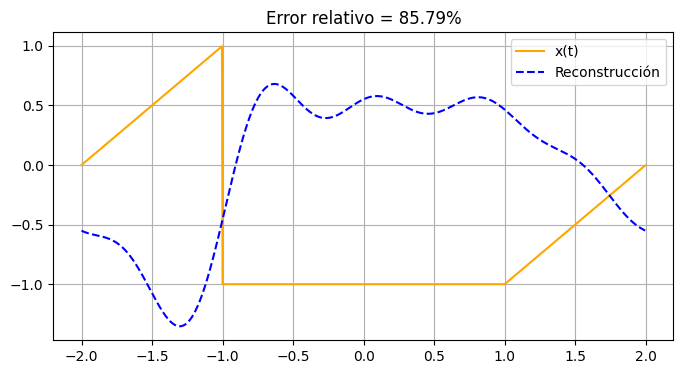

Coeficientes c_n:
 n   Re{c_n}   Im{c_n}    |c_n|  ∠c_n [rad]
-5  0.063636  0.007104 0.064031    0.111175
-4  0.001000  0.079557 0.079563    1.558230
-3 -0.106088 -0.021514 0.108247   -2.941512
-2 -0.001000 -0.159144 0.159148   -1.577080
-1  0.318305  0.201640 0.376798    0.564676
 0  0.000000  0.000000 0.000000    0.000000
 1  0.318305 -0.201640 0.376798   -0.564676
 2 -0.001000  0.159144 0.159148    1.577080
 3 -0.106088  0.021514 0.108247    2.941512
 4  0.001000 -0.079557 0.079563   -1.558230
 5  0.063636 -0.007104 0.064031   -0.111175

Coeficientes a_n y b_n:
 n       a_n       b_n
 1  0.636609  0.403281
 2 -0.002000 -0.318289
 3 -0.212175 -0.043028
 4  0.002000  0.159113
 5  0.127272  0.014208

Error relativo de reconstrucción: 85.79%


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Primero ponemos los valores básicos que vamos a usar para la señal:
A, d2, d1 = 1, 2, 1
T = 2*d2               # aquí el periodo de la señal, básicamente es el doble de d2
Fo = 1/T
Fs = 1000*Fo           # la frecuencia de muestreo, para que todo salga suave y bonito
tv = np.arange(-T/2, T/2, 1/Fs)  # este es nuestro eje de tiempo, desde -T/2 hasta T/2
wo = 2*np.pi/T
N = 5                  # la cantidad de armónicos que queremos tomar

# Ahora definimos la función que nos da la forma de la señal x(t), que es como una rampa-trapecio invertida:
def x_trap(t):
    if -d2 <= t < -d1:
        return -A*(t + d2)/(d1 - d2)      # aquí va subiendo o bajando (rampa)
    elif -d1 <= t <= d1:
        return -A                        # aquí es plana, constante, el “techo” del trapecio
    elif d1 < t <= d2:
        return -A*(d2 - t)/(d2 - d1)     # otra rampa, pero para el otro lado
    else:
        return 0                         # fuera del trapecio, todo es cero

x = np.vectorize(x_trap)(tv)             # calculamos la señal para todos los valores de tiempo

# Ahora, para poder sacar los coeficientes de Fourier usando la derivada, necesitamos la segunda derivada de x(t):
x2p = np.gradient(np.gradient(x, 1/Fs), 1/Fs)

# Aquí se arma la base de Fourier, es decir, los "patrones" con los que vamos a reconstruir la señal
phin = np.zeros((len(tv), 2*N+1), np.complex128)
for n in range(-N, N+1):
    phin[:, n+N] = np.exp(1j*n*wo*tv)

# Ahora viene lo chévere: calculamos los coeficientes c_n usando la fórmula con la segunda derivada.
cn = np.zeros(2*N+1, dtype=np.complex128)
for n in range(-N, N+1):
    if n == 0:
        cn[n+N] = 0   # el coeficiente DC queda en cero por cómo es la derivada
    else:
        I = np.trapz(x2p * np.exp(-1j*n*wo*tv), tv)
        cn[n+N] = I / (T*(n**2)*(wo**2)) # fórmula directa, solo hay que tener cuidado con el n=0

# A partir de aquí, sacamos los coeficientes a_n y b_n para la forma trigonométrica.
a_n = [2*np.real(cn[n+N]) for n in range(1, N+1)]
b_n = [-2*np.imag(cn[n+N]) for n in range(1, N+1)]

# Estos son los valores del espectro que vamos a graficar y analizar
nv = np.arange(-N, N+1)
real_part = np.real(cn)
imag_part = np.imag(cn)
magnitude = np.abs(cn)
phase = np.angle(cn)
xe = (phin * cn).sum(axis=1)  # esta es la señal reconstruida usando los armónicos

# Calculamos el error relativo para saber qué tanto se parece la reconstrucción a la original
Px = np.trapz(np.abs(x)**2, tv)        # esto es como la energía de la señal original
reconstructed_power = np.sum(np.abs(cn)**2)  # energía de la reconstruida
relative_error = 1 - reconstructed_power / Px

# ——— Aquí empiezan las gráficas ———
plt.figure(figsize=(12,8))

# Primero, la señal original y su segunda derivada
plt.subplot(3,2,1)
plt.plot(tv, x, 'orange', lw=2); plt.title("x(t)"); plt.grid()
plt.subplot(3,2,2)
plt.plot(tv, x2p, 'green', lw=1); plt.title("x''(t)"); plt.grid()

# Luego graficamos las diferentes partes del espectro de Fourier
plt.subplot(3,2,3)
plt.stem(nv, real_part, basefmt=""); plt.title("Re{c_n}"); plt.grid()
plt.subplot(3,2,4)
plt.stem(nv, imag_part, basefmt=""); plt.title("Im{c_n}"); plt.grid()
plt.subplot(3,2,5)
plt.stem(nv, magnitude, basefmt=""); plt.title("|c_n|"); plt.grid()
plt.subplot(3,2,6)
plt.stem(nv, phase, basefmt=""); plt.title("∠c_n"); plt.grid()

plt.tight_layout()
plt.show()

# Ahora vemos cómo se reconstruye la señal y la comparamos con la original
plt.figure(figsize=(8,4))
plt.plot(tv, x, 'orange', label='x(t)')
plt.plot(tv, xe.real, 'blue', ls='--', label='Reconstrucción')
plt.title(f"Error relativo = {100*relative_error:.2f}%")
plt.legend(); plt.grid(); plt.show()

# Finalmente mostramos las tablas con los resultados
df_cn = pd.DataFrame({
    'n': nv,
    'Re{c_n}': real_part,
    'Im{c_n}': imag_part,
    '|c_n|': magnitude,
    '∠c_n [rad]': phase
})
df_ab = pd.DataFrame({
    'n': range(1, N+1),
    'a_n': a_n,
    'b_n': b_n
})

print("Coeficientes c_n:")           # aquí mostramos la tabla de los coeficientes complejos
print(df_cn.to_string(index=False))
print("\nCoeficientes a_n y b_n:")   # y aquí la de los trigonométricos
print(df_ab.to_string(index=False))
print(f"\nError relativo de reconstrucción: {100*relative_error:.2f}%")  # el resumen del error
